In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("weather.csv", index_col="DATE")
df.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,GAHT,PGTM,PRCP,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-218.5,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-233.9,NaN,0.38,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-244.9,NaN,0.01,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-281.9,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-301.2,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Count null values, % by column 
df.apply(pd.isnull).sum()/df.shape[0]
df.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,GAHT,PGTM,PRCP,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-218.5,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-233.9,NaN,0.38,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-244.9,NaN,0.01,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-281.9,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",NaN,NaN,NaN,NaN,NaN,-301.2,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Documentation: keep five core measurements:
# 1. Precipitation (PRCP)
# 2. Snowfall (SNOW)
# 3. Snow depth (SNWD)
# 4. Max temp (TMAX)
# 5. Min temp (TMIN)

core = df[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core.head()

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-01-01,0.00,0.0,0.0,41.0,27.0
1960-01-02,0.38,0.0,0.0,48.0,37.0
1960-01-03,0.01,0.0,0.0,43.0,29.0
1960-01-04,0.00,0.0,0.0,33.0,24.0
1960-01-05,0.00,0.0,0.0,33.0,26.0


In [5]:
# Rename columns
core.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core.head()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,41.0,27.0
1960-01-02,0.38,0.0,0.0,48.0,37.0
1960-01-03,0.01,0.0,0.0,43.0,29.0
1960-01-04,0.00,0.0,0.0,33.0,24.0
1960-01-05,0.00,0.0,0.0,33.0,26.0


In [6]:
# Percentage of NaN values in columns
core.apply(pd.isnull).sum()/core.shape[0]

precip        0.000350
snow          0.012749
snow_depth    0.012399
temp_max      0.000219
temp_min      0.000219
dtype: float64

In [7]:
core.shape

(22825, 5)

Check the columns to see if they effect the data: Precip, snow, and snow depth. 22,825 entries total from January 1, 1960 to June 28, 2022.

In [8]:
core["precip"].value_counts()

0.00    15032
0.01      710
0.02      501
0.03      349
0.04      271
        ...  
2.40        1
2.24        1
3.31        1
2.80        1
2.92        1
Name: precip, Length: 288, dtype: int64

In [9]:
core["snow"].value_counts()

0.0    21663
0.1      163
0.2      113
0.3       84
0.4       65
       ...  
4.8        1
5.2        1
8.1        1
5.7        1
8.2        1
Name: snow, Length: 78, dtype: int64

In [10]:
core["snow_depth"].value_counts()

0.0     21718
1.0       266
2.0       191
3.0       105
4.0        48
5.0        42
1.2        32
3.1        28
6.0        24
8.0        14
9.0        14
7.0        12
10.0       10
3.9         8
5.1         5
16.0        4
11.0        4
5.9         3
15.0        3
7.1         2
18.0        2
12.0        2
14.0        2
13.0        1
17.0        1
9.8         1
Name: snow_depth, dtype: int64

In [11]:
# Look for NaNs
core[pd.isnull(core["precip"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-07-02,NaN,NaN,NaN,91.0,71.0
1996-07-03,NaN,NaN,NaN,80.0,63.0
1996-07-04,NaN,NaN,NaN,80.0,59.0
1996-07-05,NaN,NaN,NaN,83.0,61.0
1996-07-06,NaN,NaN,NaN,88.0,61.0
1996-07-07,NaN,NaN,NaN,91.0,70.0
1996-07-08,NaN,NaN,NaN,85.0,70.0
1996-07-09,NaN,NaN,NaN,80.0,66.0


In [12]:
core[pd.isnull(core["snow"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-02-03,0.00,NaN,NaN,10.0,0.0
1996-02-04,0.00,NaN,NaN,10.0,-5.0
1996-02-05,0.00,NaN,NaN,30.0,1.0
1996-02-06,0.00,NaN,NaN,37.0,16.0
1996-02-07,0.00,NaN,NaN,43.0,33.0
...,...,...,...,...,...
2002-10-27,0.00,NaN,NaN,62.0,50.0
2002-10-28,0.32,NaN,NaN,60.0,49.0
2002-10-29,0.48,NaN,NaN,56.0,44.0


In [13]:
core[pd.isnull(core["snow_depth"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-02-01,0.03,0.7,NaN,18.0,14.0
1996-02-02,0.00,0.0,NaN,16.0,4.0
1996-02-03,0.00,NaN,NaN,10.0,0.0
1996-02-04,0.00,NaN,NaN,10.0,-5.0
1996-02-05,0.00,NaN,NaN,30.0,1.0
...,...,...,...,...,...
2002-10-28,0.32,NaN,NaN,60.0,49.0
2002-10-29,0.48,NaN,NaN,56.0,44.0
2002-10-30,0.01,NaN,NaN,46.0,41.0


Out of 22,825 entries:
* Precip: 8 NaNs
* Snow: 291 NaNs
* Snow Depth: 283 NaNs

Considering the NaNs are 1.27% or less of total entries, and the other entries are 0s if "none," then it makes sense to assign 0.

In [14]:
core["precip"] = core["precip"].fillna(0)

In [15]:
core["snow"] = core["snow"].fillna(0)

In [16]:
core["snow_depth"] = core["snow_depth"].fillna(0)

In [17]:
# Check that filling NaNs worked
core.apply(pd.isnull).sum()/core.shape[0]

precip        0.000000
snow          0.000000
snow_depth    0.000000
temp_max      0.000219
temp_min      0.000219
dtype: float64

In [18]:
core[pd.isnull(core["temp_max"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-07-29,0.33,0.0,0.0,NaN,NaN
1996-08-18,0.00,0.0,0.0,NaN,NaN
1996-08-31,0.00,0.0,0.0,NaN,NaN
1996-09-01,0.00,0.0,0.0,NaN,NaN
1996-09-02,0.00,0.0,0.0,NaN,NaN


In [19]:
core[pd.isnull(core["temp_min"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1996-07-29,0.33,0.0,0.0,NaN,NaN
1996-08-18,0.00,0.0,0.0,NaN,NaN
1996-08-31,0.00,0.0,0.0,NaN,NaN
1996-09-01,0.00,0.0,0.0,NaN,NaN
1996-09-02,0.00,0.0,0.0,NaN,NaN


In [20]:
# Since temp is unlinkely to be 0, 
# and we only have 5 missing values,
# forward fill

core = core.fillna(method="ffill")

In [21]:
# Check that filling NaNs worked
core.apply(pd.isnull).sum()/core.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [22]:
# Check data types
core.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [23]:
core.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
       '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28'],
      dtype='object', name='DATE', length=22825)

In [24]:
# Convert index to datetime index
core.index = pd.to_datetime(core.index)
core.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28'],
              dtype='datetime64[ns]', name='DATE', length=22825, freq=None)

In [25]:
# Docs say to look for 9999
# as missing data values
core.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

<AxesSubplot:xlabel='DATE'>

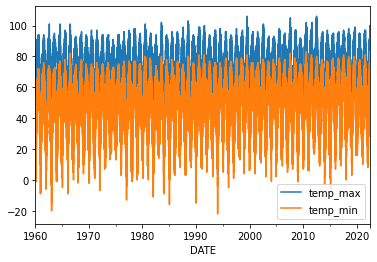

In [26]:
# Make basic plot to look for oddities
core[["temp_max", "temp_min"]].plot()

In [27]:
# How much it rained per year
core.groupby(core.index.year).sum()["precip"]

DATE
1960    38.67
1961    50.04
1962    39.91
1963    38.44
1964    46.58
        ...  
2018    68.83
2019    53.31
2020    52.90
2021    48.54
2022    24.04
Name: precip, Length: 63, dtype: float64

<AxesSubplot:xlabel='DATE'>

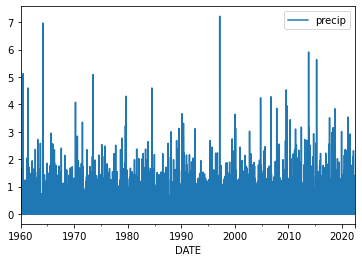

In [28]:
core[["precip"]].plot()

<AxesSubplot:xlabel='DATE'>

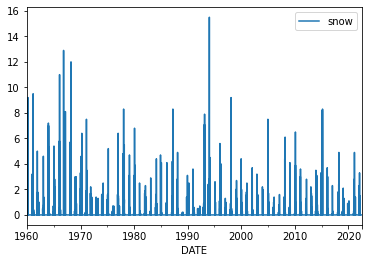

In [29]:
core[["snow"]].plot()

<AxesSubplot:xlabel='DATE'>

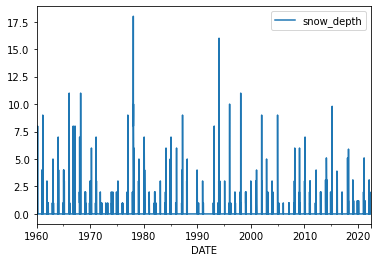

In [30]:
core[["snow_depth"]].plot()

In [31]:
# Shift for target to reflect 
# Next day actuals, max temp

core["target"] = core.shift(-1)["temp_max"]

In [32]:
core.tail(10)

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
2022-06-19,0.00,0.0,0.0,84.0,61.0,90.0
2022-06-20,0.00,0.0,0.0,90.0,61.0,96.0
2022-06-21,0.00,0.0,0.0,96.0,65.0,100.0
2022-06-22,0.00,0.0,0.0,100.0,74.0,90.0
2022-06-23,0.00,0.0,0.0,90.0,70.0,93.0
2022-06-24,0.00,0.0,0.0,93.0,67.0,94.0
2022-06-25,0.00,0.0,0.0,94.0,70.0,88.0
2022-06-26,1.18,0.0,0.0,88.0,72.0,84.0
2022-06-27,0.00,0.0,0.0,84.0,65.0,80.0


In [33]:
# Get rid of last row 
# since "tomorrow" in target NaN
core = core.iloc[:-1, :].copy() 
core.tail()

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
2022-06-23,0.00,0.0,0.0,90.0,70.0,93.0
2022-06-24,0.00,0.0,0.0,93.0,67.0,94.0
2022-06-25,0.00,0.0,0.0,94.0,70.0,88.0
2022-06-26,1.18,0.0,0.0,88.0,72.0,84.0
2022-06-27,0.00,0.0,0.0,84.0,65.0,80.0


In [34]:
# assign Ridge instance and set alpha > 0
reg = Ridge(alpha=.1)

In [35]:
# Try without snow data
predictors = ["precip", "temp_max", "temp_min"]

In [36]:
# define training and test sets
train = core.loc[:"2020-12-31"]

test = core.loc["2021-01-01":]

In [37]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [38]:
predictions = reg.predict(test[predictors])

In [39]:
# Output is the average we are "off" from target
mean_absolute_error(test["target"], predictions)

6.06502309441183

In [40]:
# Compare side-by-side
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined.head(20)

,actual,predictions
DATE,,
2021-01-01,47.0,54.069254
2021-01-02,41.0,50.976680
2021-01-03,51.0,45.765376
2021-01-04,43.0,51.511604
2021-01-05,40.0,47.150304
2021-01-06,42.0,45.051524
2021-01-07,35.0,45.569207
2021-01-08,32.0,40.718742
2021-01-09,34.0,38.180469


<AxesSubplot:xlabel='DATE'>

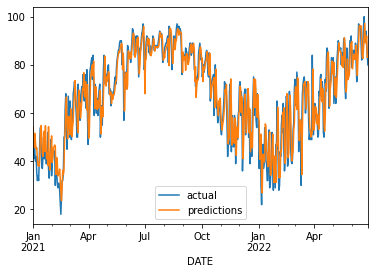

In [41]:
combined.plot()

In [42]:
# Check coeff usage
reg.coef_

array([-4.27752649,  0.71385174,  0.23204827])

In [43]:
# Precip has negative effect on temp

In [ ]:
# Make function to run and iterate over data

def create_predictions(predictors, core, reg):
    train = core.loc[:"2020-12-31"]
    test = core.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])

    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    
    return error, combined

In [46]:
# Every 30 days, find rolling mean of max temp
core["month_max"] = core["temp_max"].rolling(30).mean()
core.tail(20)

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
2022-06-08,0.00,0.0,0.0,89.0,69.0,81.0,83.500000
2022-06-09,0.00,0.0,0.0,81.0,63.0,73.0,83.333333
2022-06-10,0.10,0.0,0.0,73.0,66.0,84.0,82.766667
2022-06-11,0.00,0.0,0.0,84.0,64.0,89.0,82.600000
2022-06-12,0.00,0.0,0.0,89.0,71.0,97.0,82.666667
2022-06-13,0.00,0.0,0.0,97.0,79.0,96.0,83.033333
2022-06-14,0.00,0.0,0.0,96.0,83.0,96.0,83.333333
2022-06-15,0.00,0.0,0.0,96.0,80.0,96.0,83.866667
2022-06-16,0.00,0.0,0.0,96.0,82.0,89.0,84.233333
